In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
repairs_2014 = pd.read_csv('data/historical-repairs-2014-mini.csv',
                           encoding="utf-8", index_col=False, parse_dates=['logged-date'])

repairs_2015 = pd.read_csv('data/historical-repairs-2015-mini.csv',
                           encoding="utf-8", index_col=False, parse_dates=['logged-date'])

In [3]:
def count_repairs_by_date_all_repairs_df(df):
    tmp_df = df.drop(['property-reference', 'repair-number', 'description-for-code'], axis=1)
    tmp_df['number of repairs'] = pd.Series([1] * len(tmp_df))
    counts = tmp_df.groupby(['logged-date'], as_index=False).sum()
    return counts

In [4]:
counts_2014_df = count_repairs_by_date_all_repairs_df(repairs_2014)

counts_2015_df = count_repairs_by_date_all_repairs_df(repairs_2015)

In [5]:
year_month = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

In [6]:
def daily_to_monthly_counts(df):
    df['logged-date'] = [pd.to_datetime(d) for d in df['logged-date']]
    df['logged month'] = pd.DatetimeIndex(df['logged-date']).to_period('M')
    df['logged month'] = [year_month.get(d) for d in df['logged month'].dt.month]
    tmp_df = df.drop(['logged-date'], axis=1)
    monthly_counts = tmp_df.groupby('logged month', as_index=False).sum()
    return monthly_counts

In [7]:
monthly_counts_2014_df = daily_to_monthly_counts(counts_2014_df)
monthly_counts_2014_df = monthly_counts_2014_df.rename(columns={'number of repairs': 
                                                                'number of repairs in 2014'})

monthly_counts_2015_df = daily_to_monthly_counts(counts_2015_df)
monthly_counts_2015_df = monthly_counts_2015_df.rename(columns={'number of repairs': 
                                                                'number of repairs in 2015'})

In [8]:
joined_df = pd.merge(monthly_counts_2014_df, monthly_counts_2015_df, 
                     on=['logged month', 'logged month'], how='outer')

joined_df = joined_df.fillna(0)

In [1]:
#joined_df.head()

In [10]:
monthly_counts = joined_df.reindex(index=[4, 3, 7, 0, 8, 6, 5, 1, 11, 10, 9, 2])

In [2]:
#monthly_counts

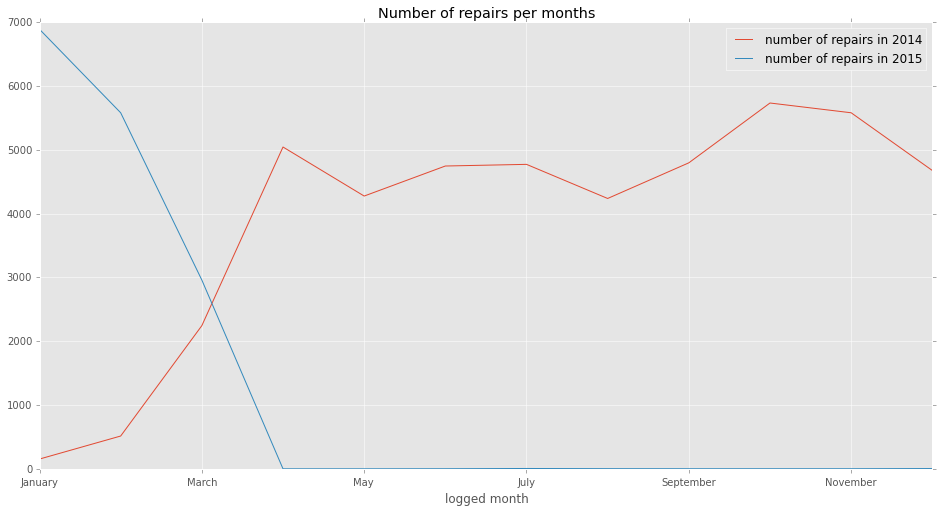

In [21]:
monthly_counts.plot(x='logged month', y=['number of repairs in 2014', 'number of repairs in 2015'],
                    figsize=(16, 8), title='Number of repairs per months')

### Were all the repair events added to the dataset in 2015?